### TODOs:

- Train and Test RNNs 
- Train and Test RNNS and LSTMs with windows
- Train and Test RNNs and LSTMs without delays and/or pupil data
- After assessing all of these, do a hyperparameter search to get best model
- See if any of this generalizes to other subjects (big one)

### NTHs: 

- Investigate the strength of the Aaronson Oracle, best window_size, etc.

### Setup

In [1]:
import os, sys
import matplotlib.pyplot as plt
plt.style.use('ggplot')

for module in ['actions', 'models']:
    path = os.path.join(os.getcwd(), '..', module)
    sys.path.append(os.path.abspath(path))

from oracle3 import oracle
from model4 import LSTM, train
from load_data2 import load_data
from inference import inference

_, _, test_data = load_data()

### Aaronson Oracle

In [12]:
window_sizes = [5, 6]
oracle_results = oracle(window_sizes)


Oracle (window 5)

trial 1 accuracy: 60.64%
trial 2 accuracy: 59.68%
trial 3 accuracy: 57.83%
trial 4 accuracy: 58.94%
trial 5 accuracy: 63.83%
trial 6 accuracy: 60.09%
trial 7 accuracy: 59.36%
trial 8 accuracy: 55.91%
trial 9 accuracy: 59.45%

Oracle 5 accuracy: 59.53%


Oracle (window 6)

trial 1 accuracy: 57.75%
trial 2 accuracy: 61.51%
trial 3 accuracy: 54.84%
trial 4 accuracy: 57.28%
trial 5 accuracy: 61.31%
trial 6 accuracy: 55.76%
trial 7 accuracy: 53.21%
trial 8 accuracy: 55.73%
trial 9 accuracy: 56.90%

Oracle 6 accuracy: 57.14%



### Train LSTM

In [3]:
models = train()

Training model 1

Random hyperparameters

{'batch_size': 142,
 'hidden_size': 75,
 'learning_rate': 0.005322370622727019,
 'num_epochs': 4,
 'num_stacked_layers': 1}


batch 0 loss: 0.6875162720680237
batch 10 loss: 0.6941422603347085
batch 20 loss: 0.6932427627699715
batch 30 loss: 0.6930725324538446
batch 40 loss: 0.6929975820750724
batch 50 loss: 0.6931624330726325
batch 60 loss: 0.6931383560915463
batch 70 loss: 0.6925485478320592
batch 80 loss: 0.6924190042931356
batch 90 loss: 0.6912632846570277
batch 100 loss: 0.6892591295856061
validation loss: 0.6802215805420508


batch 0 loss: 0.6769896149635315
batch 10 loss: 0.6660534631122242
batch 20 loss: 0.6772238129661197
batch 30 loss: 0.6771732645650064
batch 40 loss: 0.6775131996085004
batch 50 loss: 0.6770253684006485
batch 60 loss: 0.6759347524799284
batch 70 loss: 0.6747795326609007
batch 80 loss: 0.6741293683464145
batch 90 loss: 0.6742253631025881
batch 100 loss: 0.6736226465442393
validation loss: 0.6762879643684778


batch 0 

### Inference

In [2]:
models = ['0523-1537']
models_results = inference(models)

Model 0523-1537

{'batch_size': 142,
 'hidden_size': 75,
 'learning_rate': 0.005322370622727019,
 'num_epochs': 4,
 'num_stacked_layers': 1}


trial 1 accuracy: 63.73%
trial 2 accuracy: 65.12%
trial 3 accuracy: 65.71%
trial 4 accuracy: 66.04%
trial 5 accuracy: 73.62%
trial 6 accuracy: 68.16%
trial 7 accuracy: 65.62%
trial 8 accuracy: 59.85%
trial 9 accuracy: 67.23%

Avg Accuracy: 66.12%



### Oracle vs LSTM

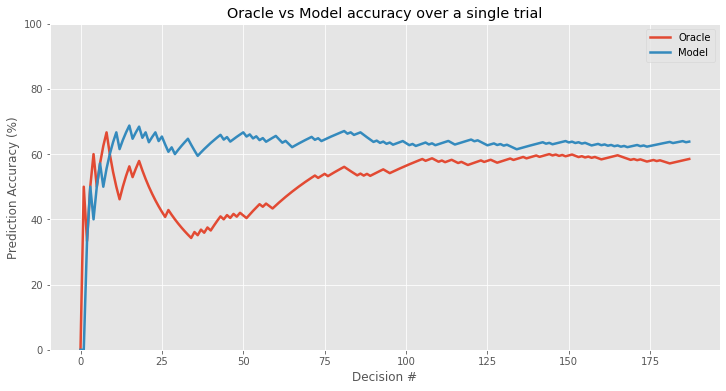

In [9]:
def plot_trial_accuracies(trial, window_size, model_name):
    results = oracle(window_size, logging=False)
    o_accuracies = results[window_size][trial]['accuracies']

    results = inference(model_name, logging=False)
    m_accuracies = results[model_name][trial]['accuracies']
    
    # trim m_accuracies to account for window_size
    m_accuracies = m_accuracies[:-window_size]

    plt.figure(figsize=(12, 6))

    plt.plot(o_accuracies, label='Oracle', lw=2.5)
    plt.plot(m_accuracies, label='Model', lw=2.5)
    plt.title('Oracle vs Model accuracy over a single trial')
    plt.xlabel('Decision (#)')
    plt.ylabel('Prediction Accuracy (%)')
    plt.ylim(0, 100)
    plt.legend()
    plt.show()

plot_trial_accuracies(1, 5, '0523-1537')

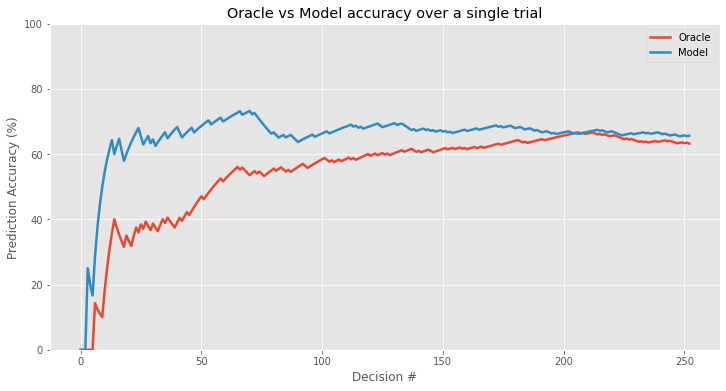

In [10]:
plot_trial_accuracies(2, 5, '0523-1537')

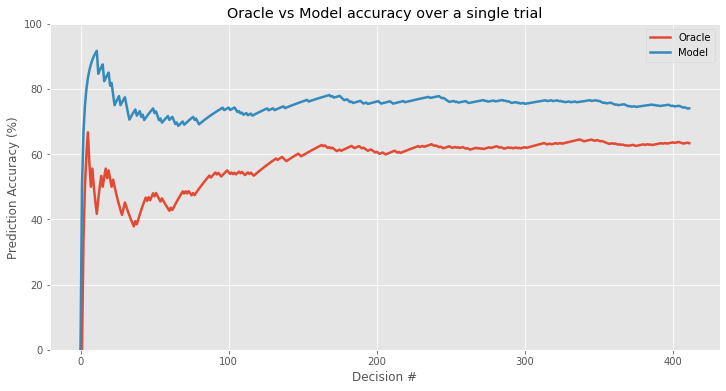

In [11]:
plot_trial_accuracies(5, 5, '0523-1537')